<a href="https://colab.research.google.com/github/idarwati/belajar/blob/main/1.MachineLearningForHealthcare/Regression_Task_PRedict_Heart_Ejection_Fraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/519/data.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [27]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [28]:
x = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

In [29]:
y = df['ejection_fraction']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [55]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [56]:
predictions = {}

# Iterate through the models dictionary
for model_name, model in models.items():
  # Fit the current model
  model.fit(x_train, y_train)

  # Step 4: Make predictions
  y_pred = model.predict(x_test)

  # Store predictions for later visualization
  predictions[model_name] = y_pred

  # Step 5 : Evaluate the model's performance
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Model: {model_name}")
  print(f"Mean Squared Error: {mse:.2f}")
  print(f"R-squared: {r2:.2f}")
  print("="*50)

Model: Linear Regression
Mean Squared Error: 104.50
R-squared: 0.08
Model: Decision Tree Regression
Mean Squared Error: 190.97
R-squared: -0.68
Model: Random Forest Regression
Mean Squared Error: 121.05
R-squared: -0.06


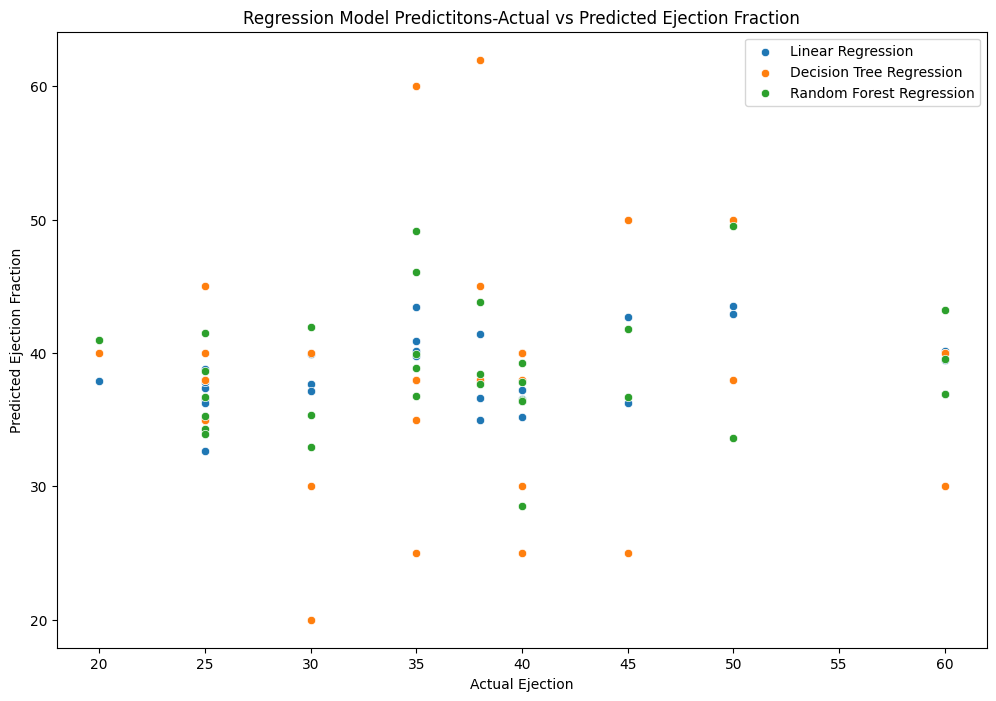

<ipython-input-57-b4104af63486>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


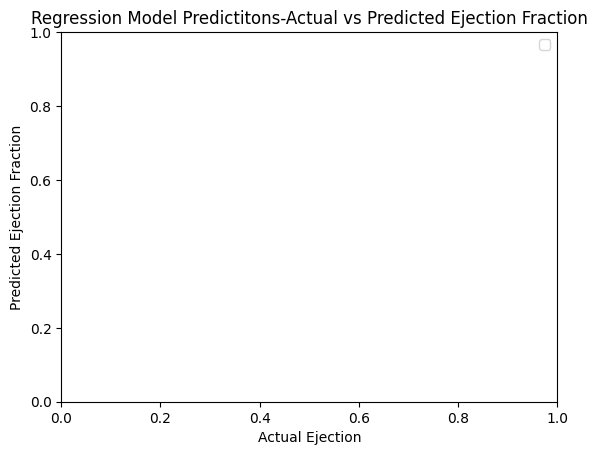

In [57]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
  sns.scatterplot(x=y_test, y=y_pred, label=model_name)

plt.title("Regression Model Predictitons-Actual vs Predicted Ejection Fraction")
plt.xlabel("Actual Ejection")
plt.ylabel("Predicted Ejection Fraction")
plt.legend()
plt.show()

plt.title("Regression Model Predictitons-Actual vs Predicted Ejection Fraction")
plt.xlabel("Actual Ejection")
plt.ylabel("Predicted Ejection Fraction")
plt.legend()
plt.show()

Feature Importance in Regression Task

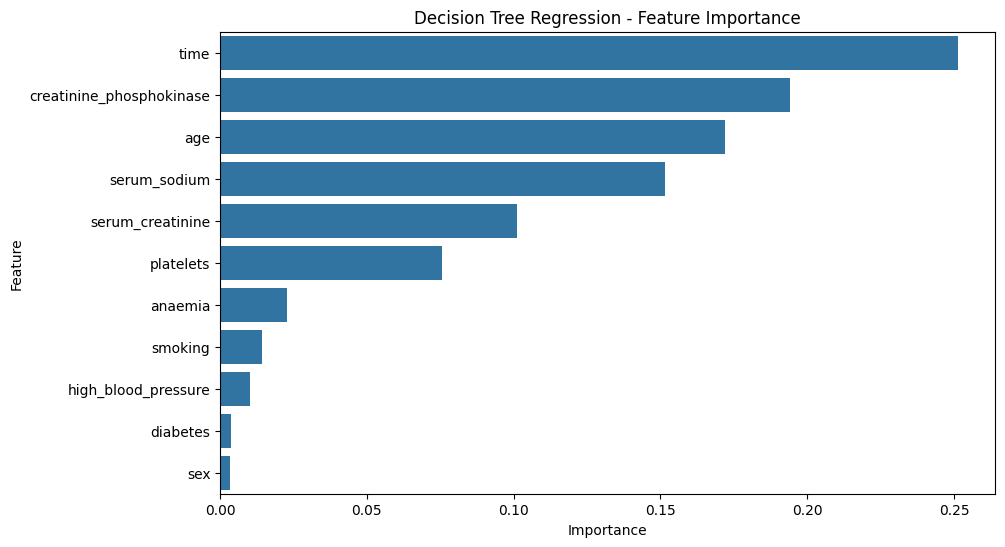

In [58]:
for model_name, model in models.items():
  if 'Tree' in model_name:
    feature_importance = model.feature_importances_
    feature_names = x.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f"{model_name} - Feature Importance")
    plt.show()

In [59]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [64]:
# Get the coefficients
coefficients = linear_model.coef_

#Display the coefficients along with corresponding feature names
future_names = x.columns
coefficient_df = pd.DataFrame({'Feature': future_names, 'Coefficient': coefficients})
coefficient_df = coefficient_df.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print("Coefficients for Linear Regression:")
print(coefficient_df)

Coefficients for Linear Regression:
                     Feature  Coefficient
1                    anaemia     0.628638
7               serum_sodium     0.455505
6           serum_creatinine     0.402843
0                        age     0.043120
10                      time     0.008482
5                  platelets     0.000009
2   creatinine_phosphokinase    -0.000232
4        high_blood_pressure    -0.137528
3                   diabetes    -0.166132
9                    smoking    -0.607768
8                        sex    -2.542435


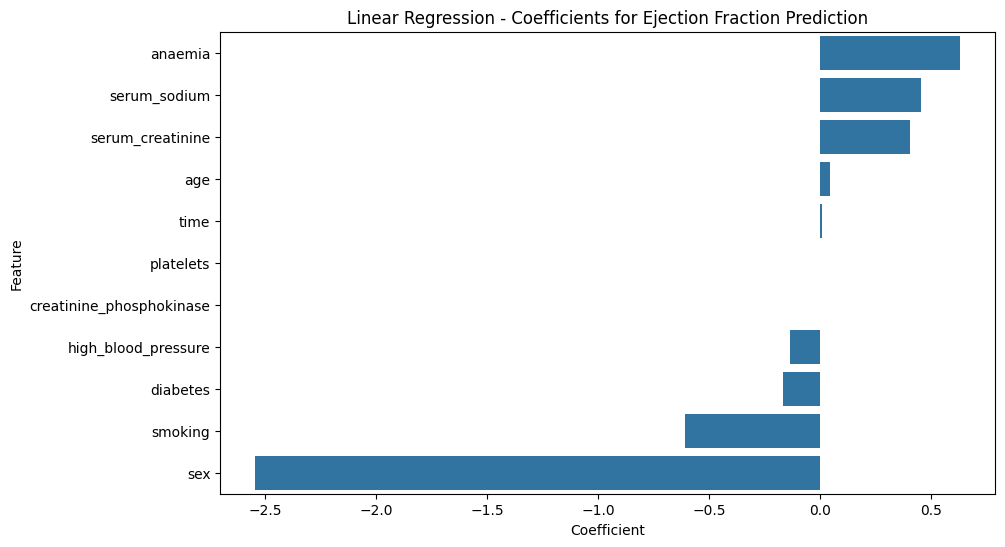

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficient_df) # Changed coefficients_df to coefficient_df
plt.title('Linear Regression - Coefficients for Ejection Fraction Prediction')
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [75]:
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(x_train_scaled, y_train)

#Get the coefficients
coefficients_scaled = linear_model_scaled.coef_

#Display the coefficients along with corresponding feature names
coefficients_df_scaled = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': coefficients_scaled})
# Corrected: Sort the coefficients_df_scaled DataFrame
coefficients_df_scaled = coefficients_df_scaled.sort_values(by='Coefficient', ascending=False)

#Display the coefficients
print("Coefficients for Linear Regression (Scaled):")
print(coefficients_df_scaled)

Coefficients for Linear Regression (Scaled):
                     Feature  Coefficient
7               serum_sodium     2.012538
5                  platelets     0.868689
10                      time     0.660073
0                        age     0.509143
6           serum_creatinine     0.385239
1                    anaemia     0.310998
4        high_blood_pressure    -0.065572
3                   diabetes    -0.082188
2   creatinine_phosphokinase    -0.208505
9                    smoking    -0.284303
8                        sex    -1.223513


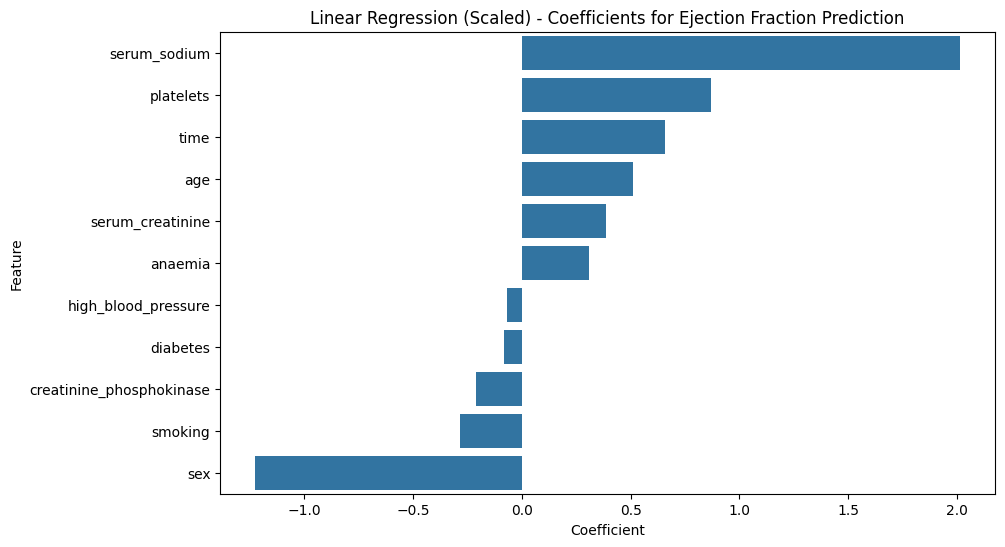

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_scaled)
plt.title('Linear Regression (Scaled) - Coefficients for Ejection Fraction Prediction')
plt.show()